# Classification Beer Recipes

In [85]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import requests
from io import StringIO

The dataset was extracted from [Kaggle](https://www.kaggle.com/datasets/jtrofe/beer-recipes), thanks to the [Brewer's Friend site](https://www.brewersfriend.com), which allows users to share their homebrew recipes. This dataset contains a selection of the recipes uploaded so far.

In [2]:
df_raw = pd.read_csv("../data/raw/recipeData.csv", encoding='latin1')
df_raw.sample(10, random_state=42)

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
47060,47061,ISA prise 1,/homebrew/recipe/view/353541/isa-prise-1,American Pale Ale,10,18.93,1.039,1.008,4.07,31.01,...,1.055,35.0,NaN,Specific Gravity,extract,0.50,22.22,NaN,NaN,61376.0
26901,26902,Citra IPA,/homebrew/recipe/view/301441/citra-ipa,American IPA,7,18.93,1.053,1.009,5.71,44.28,...,1.040,70.0,NaN,Specific Gravity,BIAB,NaN,NaN,NaN,NaN,NaN
1165,1166,Clone - Two Hearted,/homebrew/recipe/view/5109/clone-two-hearted,American IPA,7,22.71,1.064,1.010,7.00,60.95,...,1.048,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,455.0
70995,70996,Double day pale,/homebrew/recipe/view/597569/double-day-pale,American Pale Ale,10,24.00,1.055,1.010,5.86,20.84,...,1.046,80.0,3.00,Specific Gravity,All Grain,NaN,18.00,NaN,NaN,43854.0
6656,6657,Amongst the Waves Summer Ale,/homebrew/recipe/view/199244/amongst-the-waves...,American Pale Ale,10,11.36,1.060,1.011,6.39,34.97,...,1.090,35.0,NaN,Specific Gravity,extract,0.35,18.33,NaN,NaN,40478.0
22928,22929,Dankey Kang IPA,/homebrew/recipe/view/239348/dankey-kang-ipa,American IPA,7,18.93,1.071,1.017,7.17,120.94,...,1.143,35.0,NaN,Specific Gravity,extract,NaN,20.00,NaN,NaN,NaN
48176,48177,Stout (Experiment),/homebrew/recipe/view/369918/stout-experiment-,Irish Stout,93,20.82,1.044,1.011,4.41,32.74,...,1.035,75.0,NaN,Specific Gravity,BIAB,0.75,18.89,NaN,NaN,43553.0
12639,12640,Farmhouse Ale New,/homebrew/recipe/view/426247/farmhouse-ale-new,Saison,134,20.82,1.044,1.012,4.30,26.44,...,1.035,74.0,1.75,Specific Gravity,All Grain,0.75,NaN,NaN,NaN,NaN
43582,43583,Another Simple Pilsner,/homebrew/recipe/view/435707/another-simple-pi...,Bohemian Pilsener,31,18.00,1.059,1.013,6.15,42.83,...,1.035,55.0,3.00,Specific Gravity,All Grain,1.50,11.00,NaN,NaN,49368.0
33657,33658,Vasily Modified,/homebrew/recipe/view/319594/vasily-modified,Imperial Stout,87,24.50,1.081,1.015,8.59,84.22,...,1.132,30.0,NaN,Specific Gravity,extract,0.35,20.00,corn sugar,200g,NaN


In [3]:
df_raw.shape

(73861, 23)

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73861 entries, 0 to 73860
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BeerID         73861 non-null  int64  
 1   Name           73859 non-null  object 
 2   URL            73861 non-null  object 
 3   Style          73265 non-null  object 
 4   StyleID        73861 non-null  int64  
 5   Size(L)        73861 non-null  float64
 6   OG             73861 non-null  float64
 7   FG             73861 non-null  float64
 8   ABV            73861 non-null  float64
 9   IBU            73861 non-null  float64
 10  Color          73861 non-null  float64
 11  BoilSize       73861 non-null  float64
 12  BoilTime       73861 non-null  int64  
 13  BoilGravity    70871 non-null  float64
 14  Efficiency     73861 non-null  float64
 15  MashThickness  43997 non-null  float64
 16  SugarScale     73861 non-null  object 
 17  BrewMethod     73861 non-null  object 
 18  PitchR

### **Dictionary 2**
|name|description|units|type|
|----|-----------|-----|----|
|Beer ID|Record ID|NaN|int64|
|Name|Name of beer|NaN|object|
|URL|Location of recipe webpage at https://www.brewersfriend.com|NaN|object|
|Style|Type of brew|NaN|object|
|Style ID|Numeric ID for type of brew|NaN|int64|
|Size L|Amount brewed for recipe listed|Liters|float64|
|OG|The original gravity (sugar content) of the beer post Wort cooldown before pitching the yeast|SG|float64|
|FG|The final gravity (remaining sugar content) of the beer after fermentation is complete|SG|float64|
|ABV|Calculated alcohol by volume, which is determined from the difference between the OG and the FG|%|float64|
|IBU|International Bittering Units, which is how perceptively bitter the beer is (usually based on the hop addiitons and at what given time in the boil they were added)|IBU|float64|
|Color|Standard Reference Method - light to dark ex. 40 = black SRM (Standard Reference Method)|SRM|float64|
|Boil Size|Fluid at beginning of boil|Liters|float64|
|Boil Time|How long the wort was boiled|min|int64|
|Boil Gravity|Specific gravity of wort before the boil|SG|float64|
|Efficiency|How efficient the brew session was, which basically means how much possible sugars were extracted from the grains for fermenting|%|float64|
|MashThickness|Amount of water per pound of grain|L/kg|float64|
|SugarScale|Scale to determine the concentration of dissolved solids in wort|Brix|object|
|BrewMethod|Various techniques for brewing|NaN|object|
|PitchRate|Yeast added to the fermentor per gravity unit - M cells/ml/deg P|Millones de celulas/ml/P|float64|
|PrimaryTemp|Temperature at the fermenting stage|°C|float64|
|PrimingMethod|A method of carbonating beer, such as adding sugar or forced carbonation to create effervescence in the beverage|NaN|object|
|PrimingAmount|Amount of priming sugar used|g|object|
|User ID|Unique identifier of the user who created or shared the recipe.|NaN|float64|

## **Key variables**
|Variable|Description|Importance|Influence|
|--------|-----------|----------|---------|
|OG (Original Gravity)|Measures the sugar concentration in the wort before fermentation. A higher OG means a higher potential alcohol content and a fuller body.|	Determines the potential alcohol content and body of the beer, affecting its strength and texture.|Changes in OG can drastically alter the profile of the beer, as a heavier wort will result in a fuller-bodied beer with potentially more alcohol.|
|FG (Final Gravity)|Measures the remaining sugar concentration after fermentation is complete. The difference between OG and FG calculates ABV.|Impacts alcohol content and sweetness, contributing to mouthfeel and balance in the final beer.|FG affects mouthfeel and sweetness, important attributes in the final flavor of beer.|
|ABV (Alcohol by Volume)|Represents the percentage of alcohol, calculated from OG and FG. Higher ABV means a stronger beer.|Determines the strength and body of the beer, affecting the classification and sensory profile.|It affects both the perception of warmth on the palate and the level of body. It also influences the classification of beer styles.|
|IBU (International Bittering Units)|Indicates the bitterness level, determined by hop additions and boil time.|Affects the beer’s bitterness and balance with malt sweetness, essential in styles like IPAs.|A higher IBU can make the beer perceived as more bitter. It is important to find a suitable balance for the style of beer being brewed.|
|Style|Describes the beer type (e.g., Lager, IPA, Stout), which sets the expected taste, color, ABV, and IBU ranges.|Guides the expected characteristics, ensuring all other variables align with the desired beer type.|Ayuda a orientar las demás variables (como OG, FG, ABV, y IBU) para que se alineen con las expectativas del estilo.|
|Color (SRM)|Measures the beer’s color from light to dark on the Standard Reference Method (SRM) scale.|Important for meeting visual expectations of each style; dark beers often imply roasted or caramelized notes.|Color is key to matching the expectations of each style and contributes to the sensory experience of the beer.|
|Efficiency|Reflects how efficiently sugars are extracted from the grains during mashing.|Impacts the potential ABV and body, as higher efficiency yields more fermentable sugars.|It affects the final ABV, as increased efficiency can produce a beer with more alcohol or a more robust body, if the sugars are not fully fermented.|
|Primary Temp|Temperature during primary fermentation, influencing yeast activity and flavor profile.|Key for controlling the balance of desired flavors, such as esters and phenols, according to beer style.|Fermentation temperature is crucial to achieving the desired flavor profile and avoiding off-flavors.|

**Summary**
1. **OG and FG** – Determine alcohol content and body of the beer.
2. **ABV** – Important for strength classification and sensory perception.
3. **IBU** – Affects bitterness and overall flavor profile.
4. **Style** – Sets guidelines for expected beer characteristics.
5. **Color** – Enhances visual appeal and aligns with flavor expectations.
6. **Efficiency** – Influences ABV and body, affecting final taste.
7. **Primary Temp** – Controls flavor development during fermentation.

# Secundary keys variables
|Variable|Description|Importance|Influence|
|--------|-----------|----------|---------|
|Boil Size|Volume of liquid at the beginning of the boil.|Influences the concentration of flavors, bitterness (IBU), and affects the final wort gravity.|A larger boil size can dilute flavors and bitterness, while a smaller boil size increases concentration.|
|Boil Time|Duration of the boiling process.|Impacts bitterness extraction from hops, as longer boil times increase bitterness and flavor concentration.|Extended boil times lead to higher bitterness and color changes, enhancing hop flavors in hoppy styles like IPAs.|
|Boil Gravity|Specific gravity of the wort before boiling.|Helps in adjusting hops and other ingredient amounts for achieving the desired flavor and bitterness.|A higher boil gravity can result in stronger malt flavors and a thicker body, particularly important in strong ales.|
|Mash Thickness|Amount of water per pound of grain in the mash.|Affects the extraction of fermentable sugars, which in turn impacts OG, body, and mouthfeel.|Thicker mashes (less water) enhance body and sweetness, while thinner mashes increase fermentable sugars.|
|Sugar Scale|Scale used to measure dissolved solids in the wort, often Brix or Plato.|Standardizes measurement for gravity readings, helping with consistent adjustments in OG and FG.|Ensures precise gravity readings, which are essential for achieving consistent alcohol levels and body.|
|Brew Method|Brewing method (e.g., All Grain, Extract), which affects the complexity of flavors and efficiency.|Provides context for other variables, as different methods yield different extraction efficiencies.|All-grain brewing often produces more complex flavors, while extract brewing can result in cleaner, simpler flavors.|
|Pitch Rate|Amount of yeast pitched per gravity unit, often measured in millions of cells/ml/°P.|Influences fermentation rate, flavor development, and final gravity (FG), affecting the balance of the beer.|Higher pitch rates result in cleaner fermentations, while lower rates may enhance fruity or ester flavors.|
|Priming Method|Carbonation method used post-fermentation (e.g., sugar, forced carbonation).|Contributes to the carbonation level, which affects mouthfeel, aroma release, and sensory experience.|Natural priming creates finer bubbles, adding softness, while forced carbonation gives a sharper mouthfeel.|
|Priming Amount|Amount of priming sugar added for carbonation.|Helps achieve desired carbonation levels, enhancing texture and visual appearance.|More priming sugar results in higher carbonation, important for enhancing mouthfeel and releasing aromas.|

**Explanation of Secondary Variables’ Influence**
1. **Boil Size, Boil Time, and Boil Gravity** - These factors contribute directly to flavor concentration and bitterness extraction. They allow control over wort concentration, influencing the beer's balance between sweetness and bitterness, which is essential in hop-forward styles (e.g., IPAs) and darker, maltier styles (e.g., stouts).
2. **Mash Thickness** - Modifying mash thickness affects the extraction of sugars, which influences the body, sweetness, and dryness of the beer. For instance, a thicker mash retains more unfermentable sugars, resulting in a fuller-bodied beer, ideal for styles like porters and stouts.
3. **Sugar Scale** Ensures precision in measuring OG and FG, crucial for consistency in alcohol content and body. Accurate readings using a standardized scale (like Brix or Plato) enable reproducible recipes and controlled fermentation outcomes.
4. **Brew Method** - Influences the complexity of flavors and efficiency in extraction. All-grain brewing typically offers more depth and character, as grains are mashed and extracted fresh, while extract brewing provides simplicity, often yielding cleaner profiles.
5. **Pitch Rate** - Affects the speed and profile of fermentation. High pitch rates tend to produce cleaner, more neutral flavors by avoiding stress on the yeast, while lower rates can add complexity, increasing esters and phenols, particularly in styles like Belgian ales.
6. **Priming Method and Amount** - These control the beer's carbonation level, impacting mouthfeel, aroma, and visual appeal. Higher carbonation (from more priming sugar or natural carbonation) enhances aroma release and can add a creamy texture, especially desirable in styles like Belgian ales and wheat beers.

In [20]:
(df_raw.isnull().sum() / len(df_raw)) * 100

BeerID            0.000000
Name              0.002708
URL               0.000000
Style             0.806921
StyleID           0.000000
Size(L)           0.000000
OG                0.000000
FG                0.000000
ABV               0.000000
IBU               0.000000
Color             0.000000
BoilSize          0.000000
BoilTime          0.000000
BoilGravity       4.048144
Efficiency        0.000000
MashThickness    40.432705
SugarScale        0.000000
BrewMethod        0.000000
PitchRate        53.143066
PrimaryTemp      30.681957
PrimingMethod    90.847673
PrimingAmount    93.536508
UserId           68.358132
dummy             0.000000
dtype: float64

**Faltan valores en Style(0.8%), BoilGravity(4%), MashingThickness(40%), PitchRate(53%), PrimaryTemp(30%),PrimimgMethod(90.8%) and PrimingAmount(93.5%).**


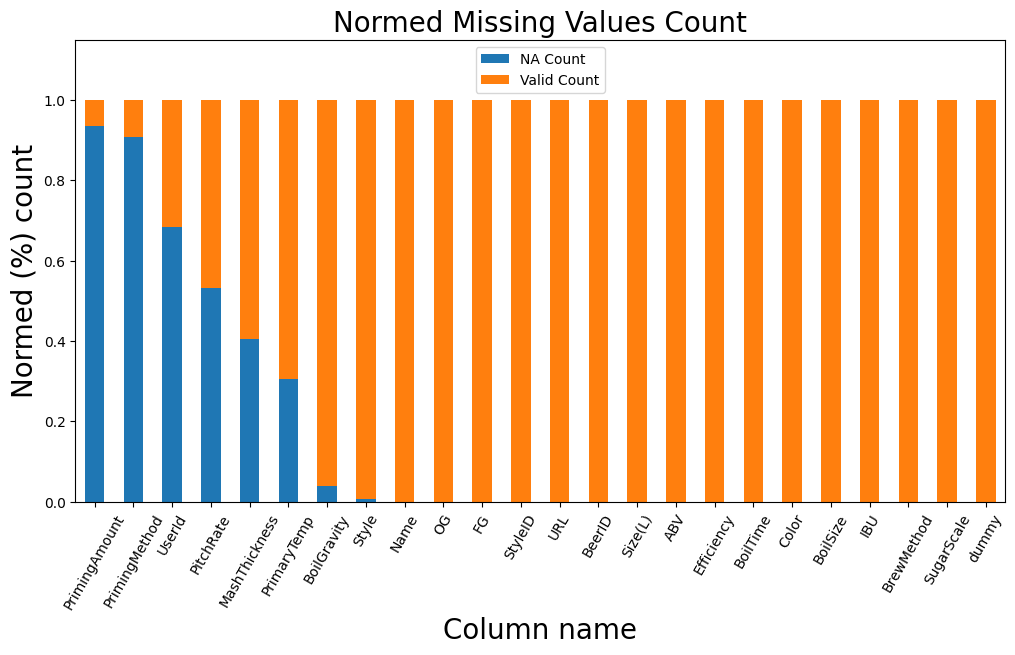

In [26]:
df_missing = df_raw.copy()
df_missing = df_missing.T
true = df_missing.isnull().sum(axis=1)
false = (len(df_missing.columns) - true)
df_missing['Valid Count'] = false / len(df_missing.columns)
df_missing['NA Count'] = true / len(df_missing.columns)

df_missing[['NA Count','Valid Count']].sort_values(
    'NA Count', ascending=False).plot.bar(
    stacked=True,figsize=(12,6))
plt.legend(loc=9)
plt.ylim(0,1.15)
plt.title('Normed Missing Values Count', fontsize=20)
plt.ylabel('Normed (%) count', fontsize=20)
plt.xlabel('Column name', fontsize=20)
plt.xticks(rotation=60)
plt.show()

df = df_raw[pd.notnull(df_raw['Style'])] 

In [14]:
df_raw["dummy"] = np.random.normal(0,1,df_raw.shape[0])
df_raw.sample(10, random_state=42)

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId,dummy
47060,47061,ISA prise 1,/homebrew/recipe/view/353541/isa-prise-1,American Pale Ale,10,18.93,1.039,1.008,4.07,31.01,...,35.0,NaN,Specific Gravity,extract,0.50,22.22,NaN,NaN,61376.0,-0.019869
26901,26902,Citra IPA,/homebrew/recipe/view/301441/citra-ipa,American IPA,7,18.93,1.053,1.009,5.71,44.28,...,70.0,NaN,Specific Gravity,BIAB,NaN,NaN,NaN,NaN,NaN,0.583528
1165,1166,Clone - Two Hearted,/homebrew/recipe/view/5109/clone-two-hearted,American IPA,7,22.71,1.064,1.010,7.00,60.95,...,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,455.0,-0.366481
70995,70996,Double day pale,/homebrew/recipe/view/597569/double-day-pale,American Pale Ale,10,24.00,1.055,1.010,5.86,20.84,...,80.0,3.00,Specific Gravity,All Grain,NaN,18.00,NaN,NaN,43854.0,-0.099784
6656,6657,Amongst the Waves Summer Ale,/homebrew/recipe/view/199244/amongst-the-waves...,American Pale Ale,10,11.36,1.060,1.011,6.39,34.97,...,35.0,NaN,Specific Gravity,extract,0.35,18.33,NaN,NaN,40478.0,1.051748
22928,22929,Dankey Kang IPA,/homebrew/recipe/view/239348/dankey-kang-ipa,American IPA,7,18.93,1.071,1.017,7.17,120.94,...,35.0,NaN,Specific Gravity,extract,NaN,20.00,NaN,NaN,NaN,0.105435
48176,48177,Stout (Experiment),/homebrew/recipe/view/369918/stout-experiment-,Irish Stout,93,20.82,1.044,1.011,4.41,32.74,...,75.0,NaN,Specific Gravity,BIAB,0.75,18.89,NaN,NaN,43553.0,0.661364
12639,12640,Farmhouse Ale New,/homebrew/recipe/view/426247/farmhouse-ale-new,Saison,134,20.82,1.044,1.012,4.30,26.44,...,74.0,1.75,Specific Gravity,All Grain,0.75,NaN,NaN,NaN,NaN,-0.173133
43582,43583,Another Simple Pilsner,/homebrew/recipe/view/435707/another-simple-pi...,Bohemian Pilsener,31,18.00,1.059,1.013,6.15,42.83,...,55.0,3.00,Specific Gravity,All Grain,1.50,11.00,NaN,NaN,49368.0,-1.083781
33657,33658,Vasily Modified,/homebrew/recipe/view/319594/vasily-modified,Imperial Stout,87,24.50,1.081,1.015,8.59,84.22,...,30.0,NaN,Specific Gravity,extract,0.35,20.00,corn sugar,200g,NaN,1.025582


In [27]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73861 entries, 0 to 73860
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BeerID         73861 non-null  int64  
 1   Name           73859 non-null  object 
 2   URL            73861 non-null  object 
 3   Style          73265 non-null  object 
 4   StyleID        73861 non-null  int64  
 5   Size(L)        73861 non-null  float64
 6   OG             73861 non-null  float64
 7   FG             73861 non-null  float64
 8   ABV            73861 non-null  float64
 9   IBU            73861 non-null  float64
 10  Color          73861 non-null  float64
 11  BoilSize       73861 non-null  float64
 12  BoilTime       73861 non-null  int64  
 13  BoilGravity    70871 non-null  float64
 14  Efficiency     73861 non-null  float64
 15  MashThickness  43997 non-null  float64
 16  SugarScale     73861 non-null  object 
 17  BrewMethod     73861 non-null  object 
 18  PitchR

In [103]:
df_raw["PrimingAmount"].sample(30)

44440     NaN
20446     NaN
15147     NaN
24438     NaN
32848     NaN
44729     NaN
15689     NaN
31321     NaN
8770      NaN
15723     NaN
39967     NaN
64478     NaN
22574     NaN
70746     NaN
36125     NaN
6754      NaN
43152     NaN
56803     NaN
68420     NaN
48826     NaN
6211      NaN
70606     NaN
23931     NaN
4875      NaN
55751     NaN
22051     NaN
69032     NaN
57126     NaN
39587    120g
18341     NaN
Name: PrimingAmount, dtype: object

Variables categoricas : Name, Style, 
variables numericas : Beer 

In [79]:
#Tranformacion y preprocesamiento
df_interim = (
    df_raw
    .copy()
    .set_axis(
        df_raw.columns.str.replace(" ", "_") #encuentra los espacios blancos y remplazalo por _
        .str.replace(r"\W", "", regex=True) #remplazar caracteres no alfabeticos por nada 
        .str.lower() # resultado de lo que cambiamos lo pasamos a minuscula
        .str.slice(0, 40),axis=1 # slice sirve para cortar el texto hasta un maximo de 40 caracteres
        
    )
    .drop_duplicates()
    .drop("style", axis=1)
    .rename(columns={"styleid": "target"})
    .astype({"target": "category", 
             "name": "category", 
             "url": "category", 
             "sugarscale": "category", 
             "brewmethod": "category", 
             "primingmethod": "category", 
             "primingamount": "category"}) #drop duplicate para desacernos de los duplicados reanme para cambiar nombre de columnas
)

In [82]:
df_interim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73861 entries, 0 to 73860
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   beerid         73861 non-null  int64   
 1   name           73859 non-null  category
 2   url            73861 non-null  category
 3   target         73861 non-null  category
 4   sizel          73861 non-null  float64 
 5   og             73861 non-null  float64 
 6   fg             73861 non-null  float64 
 7   abv            73861 non-null  float64 
 8   ibu            73861 non-null  float64 
 9   color          73861 non-null  float64 
 10  boilsize       73861 non-null  float64 
 11  boiltime       73861 non-null  int64   
 12  boilgravity    70871 non-null  float64 
 13  efficiency     73861 non-null  float64 
 14  mashthickness  43997 non-null  float64 
 15  sugarscale     73861 non-null  category
 16  brewmethod     73861 non-null  category
 17  pitchrate      34609 non-null  

In [84]:
df = df_interim.copy().reset_index()

In [86]:
df_train, df_test = train_test_split(df, 
                                     random_state=2024, 
                                     test_size=0.20, 
                                     stratify=df['target'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59088 entries, 5996 to 6319
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   index          59088 non-null  int64   
 1   beerid         59088 non-null  int64   
 2   name           59086 non-null  category
 3   url            59088 non-null  category
 4   target         59088 non-null  category
 5   sizel          59088 non-null  float64 
 6   og             59088 non-null  float64 
 7   fg             59088 non-null  float64 
 8   abv            59088 non-null  float64 
 9   ibu            59088 non-null  float64 
 10  color          59088 non-null  float64 
 11  boilsize       59088 non-null  float64 
 12  boiltime       59088 non-null  int64   
 13  boilgravity    56691 non-null  float64 
 14  efficiency     59088 non-null  float64 
 15  mashthickness  35196 non-null  float64 
 16  sugarscale     59088 non-null  category
 17  brewmethod     59088 non-null  cat

In [87]:
display(df_train.describe(include="number").T)
display(df_train.describe(include="category").T)

,count,mean,std,min,25%,50%,75%,max
index,59088.0,36911.994500,21345.174470,0.000000,18418.500000,36936.500000,55386.750000,73860.000000
beerid,59088.0,36912.994500,21345.174470,1.000000,18419.500000,36937.500000,55387.750000,73861.000000
sizel,59088.0,43.823942,176.054494,1.000000,18.930000,20.820000,23.660000,7800.000000
og,59088.0,1.407210,2.196730,1.000000,1.051000,1.058000,1.069000,34.034500
fg,59088.0,1.075977,0.433740,-0.003000,1.011000,1.013000,1.017000,23.424600
abv,59088.0,6.134909,1.866761,0.000000,5.080000,5.790000,6.820000,52.160000
ibu,59088.0,44.285936,41.529611,0.000000,23.390000,35.790000,56.390000,3409.300000
color,59088.0,13.392296,11.937342,0.000000,5.170000,8.410000,16.770000,186.000000
boilsize,59088.0,49.646723,187.881673,1.000000,20.820000,27.440000,30.000000,7800.000000
boiltime,59088.0,65.064937,15.036033,0.000000,60.000000,60.000000,60.000000,240.000000


,count,unique,top,freq
name,59086,47983,Awesome Recipe,1058
url,59088,59088,/homebrew/recipe/view/99939/30-minute-cascade,1
target,59088,176,7,9552
sugarscale,59088,2,Specific Gravity,57560
brewmethod,59088,4,All Grain,39783
primingmethod,5496,742,Corn Sugar,597
primingamount,3880,1641,5 oz,158


**Numericas**
sizel: revisar outlaiers, esto podria representar el tama;o de la reseta del volumen muy grande de algunos datos.
og: el ultimo cuartil ers muy elevado a comparacion del resto
fg: el ultimo cuartil ers muy elevado a comparacion del resto, revisar outlaiers
abv: revisar outlaiers
IBU: revisar outlaiers
Color: revisar outlaiers
Boilsize:
BoilTime:
boilgravity:
efficiency:
mashthickness:
primarytemp:

**Categoricas**


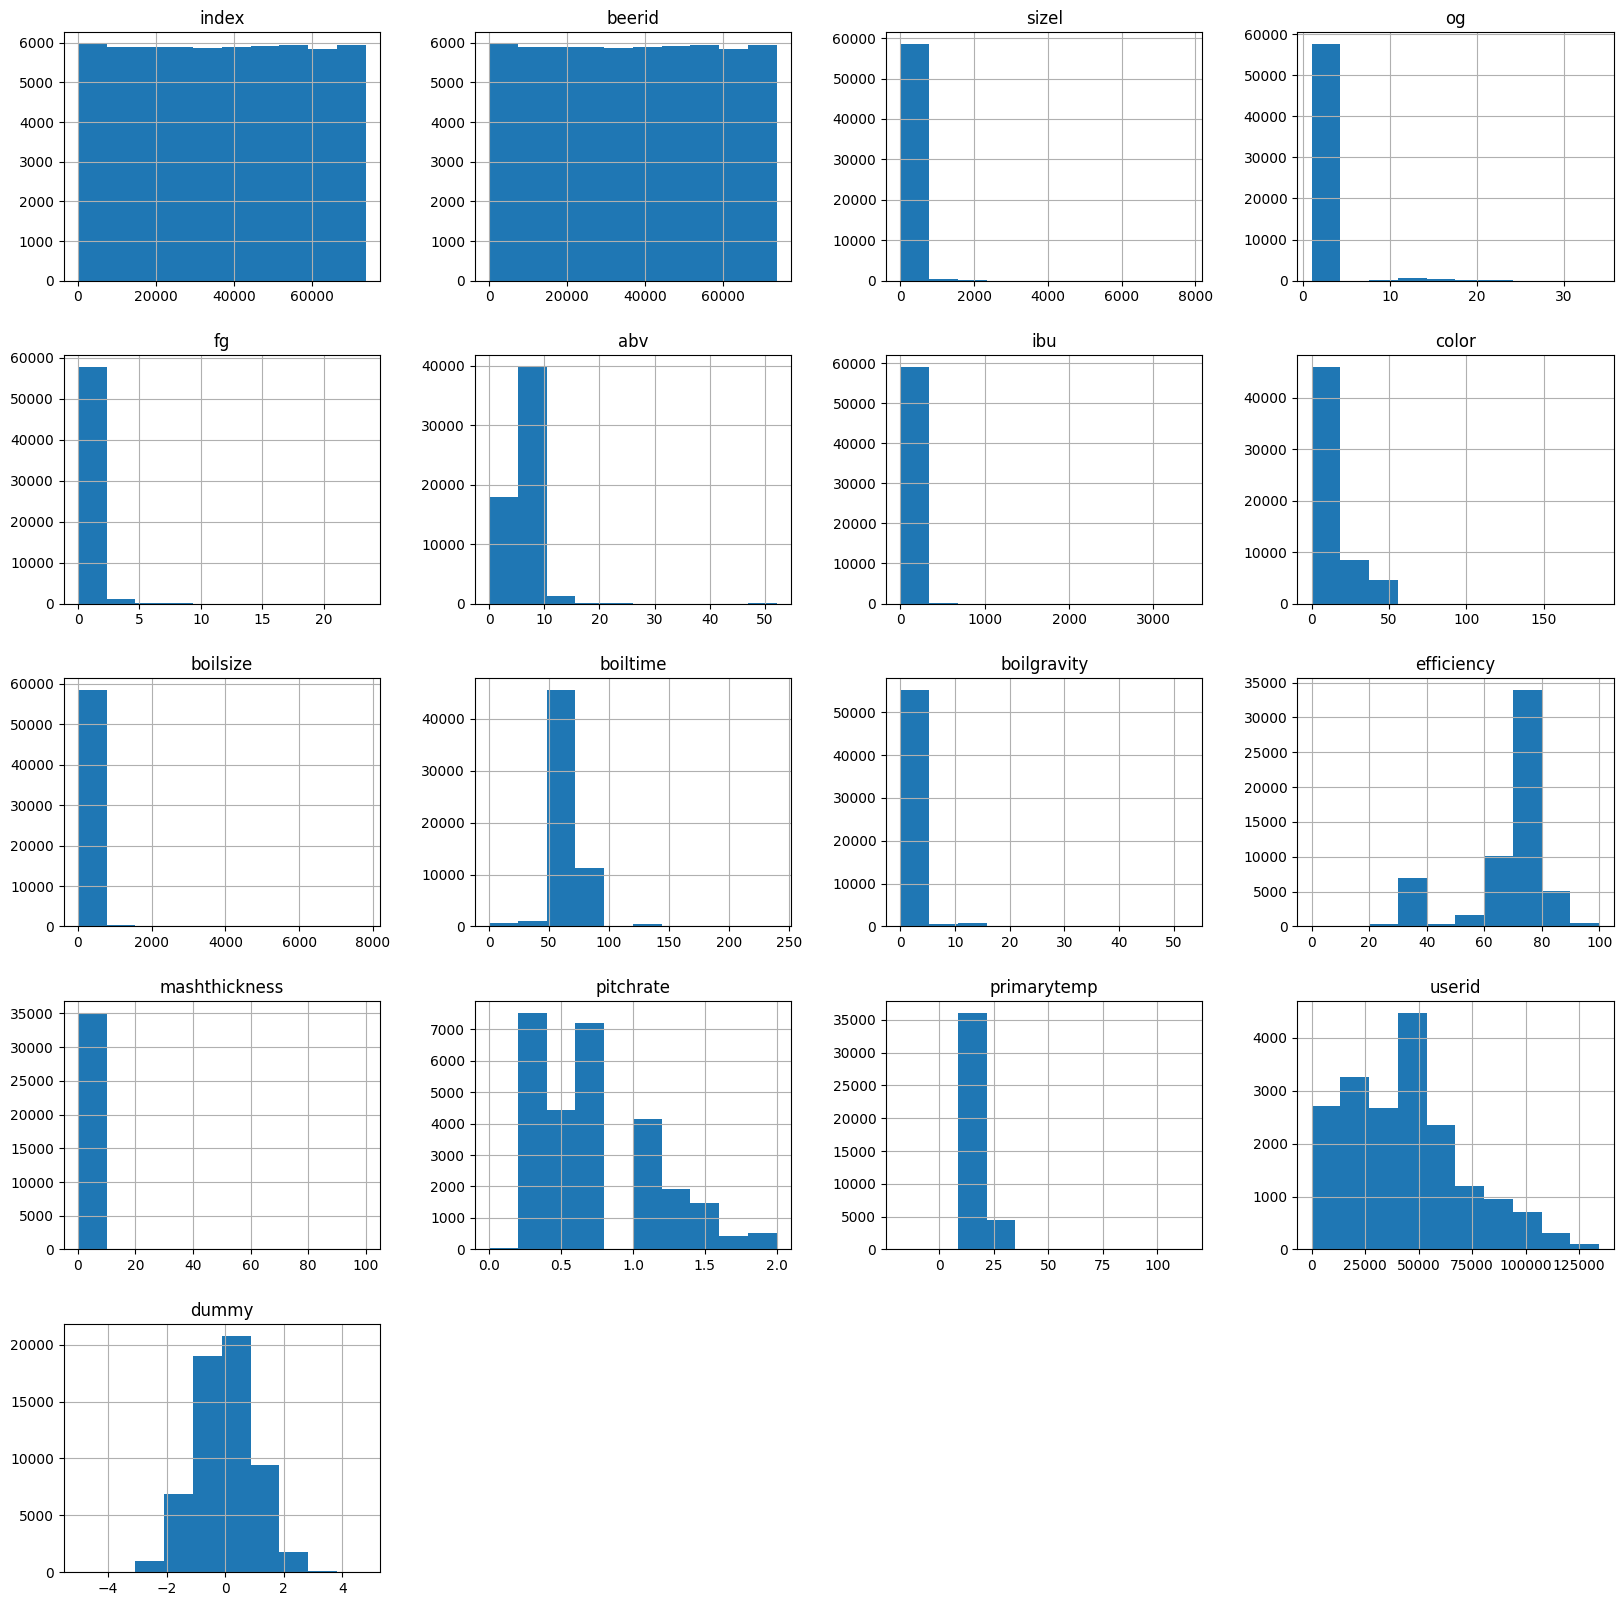

In [104]:
df_train.hist(figsize=(20, 20))
plt.show()

In [ ]:
sns.pairplot(data=df_train)
plt.show